In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/colleenjung/Desktop/UChicago/EDA/DataScientist.csv'  # Replace with your file path
df = pd.read_csv(file_path)
df.describe()

,Unnamed: 0,index,Rating,Founded
count,3909.000000,3909.000000,3909.000000,3909.000000
mean,1954.000000,2167.446662,3.283576,1479.154771
std,1128.575429,1247.657849,1.575749,855.750138
min,0.000000,0.000000,-1.000000,-1.000000
25%,977.000000,1121.000000,3.200000,1625.000000
50%,1954.000000,2161.000000,3.700000,1976.000000
75%,2931.000000,3249.000000,4.100000,2002.000000
max,3908.000000,4379.000000,5.000000,2020.000000


In [10]:
df.head(10)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
5,5,5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,"Colony Specialty, Markel, RLI",-1
6,6,6,Quantitative Researcher,$111K-$181K (Glassdoor est.),Experience: Entry-level (PhD Program) or Exper...,4.4,PDT Partners\n4.4,"New York, NY","New York, NY",51 to 200 employees,1993,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,7,7,Quantitative Research Associate,$111K-$181K (Glassdoor est.),Seeking a quant to work with senior researcher...,-1.0,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
8,8,8,AI Scientist,$111K-$181K (Glassdoor est.),Paige is a software company helping pathologis...,5.0,Paige\n5.0,"New York, NY","New York, NY",1 to 50 employees,2018,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,True
9,9,9,Quantitative Researcher,$111K-$181K (Glassdoor est.),"About the Position\n\n\nAt Jane Street, we con...",4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1


In [11]:
# outliers in rating & founded
# we can further investigate the scatterplot of founded vs rating

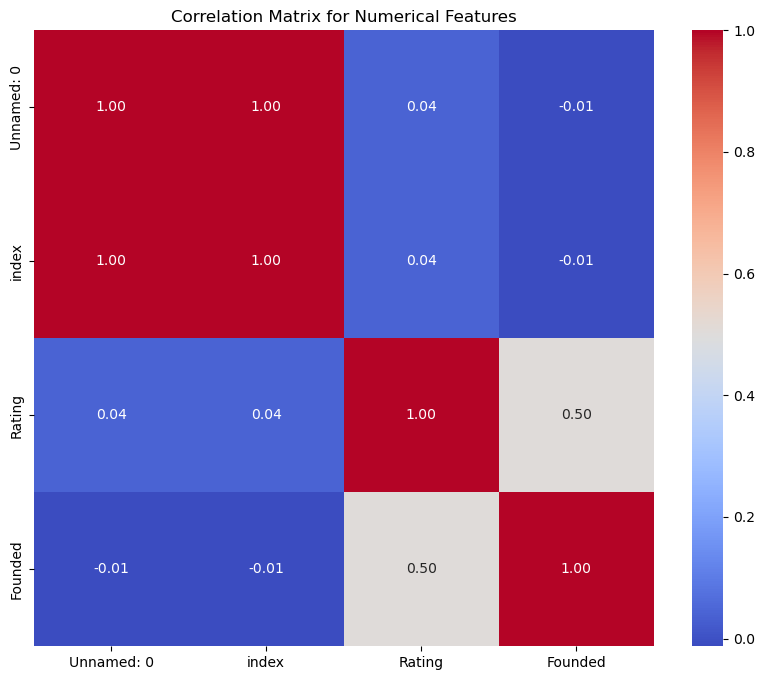

In [12]:
# For the correlation matrix, we only consider numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [13]:
#Clean1-Easy Apply column has -1 values, replacing them with boolean value False
df['Easy Apply'] = df['Easy Apply'].fillna(False).astype(bool) 
df['Easy Apply'].value_counts()

#df.replace(['-1'], [np.nan], inplace=True)
df.replace(['-1.0'], [np.nan], inplace=True)
df.replace([-1], [np.nan], inplace=True)

NameError: name 'np' is not defined

In [ ]:
df.isnull().sum()

In [ ]:
#Creating separate columns of Salary Estimate as minimum and maximum salary

In [ ]:
df_salary = df['Salary Estimate'].str.split("-",expand=True,)

minimum_salary = df_salary[0]
minimum_salary = minimum_salary.str.replace('K',' ')


maximum_salary = df_salary[1].str.replace('(Glassdoor est.)', ' ')
maximum_salary = maximum_salary.str.replace('(', ' ')
maximum_salary = maximum_salary.str.replace(')', ' ')
maximum_salary = maximum_salary.str.replace('K', ' ')
maximum_salary = maximum_salary.str.replace('Employer est.', ' ')
maximum_salary = maximum_salary.str.replace('Per Hour', ' ')

maximum_salary = maximum_salary.str.replace('$', ' ').fillna(0).astype(int)
minimum_salary = minimum_salary.str.replace('$', ' ').fillna(0).astype(int)

In [ ]:
df['Minimum Salary'] = minimum_salary
df['Maximum Salary'] = maximum_salary

df.drop('Salary Estimate',axis = 1,inplace = True)
df['Company Name'] = df['Company Name'].str.replace('\n.*', ' ')
df['Est_Salary']= (df['Minimum Salary']+df['Maximum Salary'])/2
df['Est_Salary']

In [ ]:
#Making city and state columns for both Location and Headquaters
Location = df['Location'].str.split(",",expand=True,)
Location_City = Location[0]
Location_State = Location[1]
df['Location City'] = Location_City
df['Location State'] = Location_State
df.drop('Location',axis = 1, inplace = True)


HQ = df['Headquarters'].str.split(",",expand=True)
Headquarters_City = HQ[0]
Headquarters_State = HQ[1]
df['Headquarters City'] = Headquarters_City
df['Headquarters State'] = Headquarters_State
df.drop('Headquarters',axis = 1, inplace = True)

In [ ]:
#Separating department and from job title column --and drop dep.
department = df['Job Title'].str.split(',', expand = True)
df['Job Title'] = department[0]


In [ ]:
df['Job Title'].value_counts()

In [ ]:
#clean2
clean_df = df[(data_scientist_df['Rating'] >= 0) & (df['Founded'] > 0)]

# For the correlation matrix, we only consider numerical columns
numerical_data = clean_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()
# we can further investigate the scatterplot of founded vs rating

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

## Preparing data for modeling for clean_df

# We will use 'Rating' as the target variable and 'Founded' as the feature.
X =clean_df[['Founded']]
y = clean_df['Rating']

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fitting the model using statsmodels
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Getting the summary of the regression
summary = results.summary()
summary_pvalues = results.pvalues



In [ ]:
# Extracting the p-value for the 'Founded' coefficient
p_value = summary_pvalues[1]  # Index 1 is 'Founded' after the constant

summary, p_value

#Ho : NO relationship
#Ha: There is realtionhip btw 'rating' and 'founded'

# reject the null and conlude the that there is a relationshion
# given that R-squared: 0.008 goodness of fit questionable.

In [ ]:
##modeling for df


# We will use 'Rating' as the target variable and 'Founded' as the feature.
X =df[['Founded']]
y =df['Rating']

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fitting the model using statsmodels
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Getting the summary of the regression
summary = results.summary()
summary_pvalues = results.pvalues



In [ ]:
# Extracting the p-value for the 'Founded' coefficient
p_value = summary_pvalues[1]  # Index 1 is 'Founded' after the constant

summary, p_value

#Ho : NO relationship
#Ha: There is realtionhip btw 'rating' and 'founded'
# rejct the null and conlude the that there is a relationshion
# given that R-squared: 0.260 goodness of fit slightly better.

In [ ]:
# The provided code snippet seems to refer to 'df', which is not defined in the current context.
# Assuming 'df' refers to 'data_scientist_df', the original DataFrame loaded previously.
# Let's create a clean DataFrame without outliers and then perform ANOVA.

# Creating a clean DataFrame without outliers for 'Rating' and 'Founded'
clean_df = df[(data_scientist_df['Rating'] >= 0) & (data_scientist_df['Founded'] > 0)]

# Now, we fit two different OLS models: one with the original dataset and one with the cleaned dataset.

# Original DataFrame with outliers
X_orig = df[['Founded']]
y_orig = df['Rating']
X_orig_scaled = scaler.fit_transform(X_orig[X_orig['Founded'] > 0])  # Scaling only valid 'Founded' values
X_orig_scaled_with_const = sm.add_constant(X_orig_scaled)  # Adding a constant
model_orig = sm.OLS(y_orig[(X_orig['Founded'] > 0)], X_orig_scaled_with_const)  # Fitting the model
results_orig = model_orig.fit()

# Cleaned DataFrame without outliers
X_clean = clean_df[['Founded']]
y_clean = clean_df['Rating']
X_clean_scaled = scaler.fit_transform(X_clean)  # Scaling
X_clean_scaled_with_const = sm.add_constant(X_clean_scaled)  # Adding a constant
model_clean = sm.OLS(y_clean, X_clean_scaled_with_const)  # Fitting the model
results_clean = model_clean.fit()

# Perform ANOVA (Analysis of Variance) to compare the two models
anova_results = sm.stats.anova_lm(results_orig, results_clean)
anova_results


In [ ]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.viridis(np.linspace(0,1,20))
df["Job Title"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Data Science Job",fontsize=20)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (12,9)
color = plt.cm.plasma(np.linspace(0,1,20))
df["Company Name"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Company with Highest number of Jobs in Data Science",fontsize=20)
plt.xlabel("Company Name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.cool(np.linspace(0,1,20))
df["Headquarters City"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Head Quarter City of Data Science Job Holder Company",fontsize=20)
plt.xlabel("Headquarters City",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.hot(np.linspace(0,1,20))
df["Location City"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 City for Data Science Job",fontsize=20)
plt.xlabel("Location City",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [ ]:
data1 = df.groupby('Job Title')[['Minimum Salary', 'Maximum Salary']].mean().sort_values(['Maximum Salary','Minimum Salary'],ascending=False).head(25)
data1.head(15)

In [ ]:
data1.tail()

In [ ]:
data4 = pd.DataFrame(df['Sector'].value_counts())
data4.head()

In [ ]:
import plotly.express as px
fig = px.pie(data, values=data['Sector'], names=data4.index)
fig.update_layout(title = 'Percentage of Different Sectors with requirement of Data Scientist  Roles')
fig.show()